In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Pima Indians Diabetes Database


### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### Dataset Content
The Pima Indians diabetes dataset involves predicting the onset of diabetes within 5 years in Pima Indians given the medical details.

It is a binary classification problem (2 classes). The number of observations for each class is not balanced. There are 768 observations with 8 input variables and 1 output variable. The missing values ​​are believed to be encoded with zero values.

The names of the variables are as follows:

- Number of pregnancies.
- 2-hour plasma glucose concentration in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skin fold thickness (mm).
- 2-hour serum insulin (mu U / ml).
- Body mass index (weight in kg / (height in m) ^ 2).
- Role of the pedigree of diabetes.
- Age.
- Class variable (0 or 1).
The benchmark performance for predicting the most prevalent class is a classification accuracy of approximately 65%. The best results achieve a classification accuracy of approximately 77%.

In [36]:
df=pd.read_csv('./data/diabetes.csv', sep=',',header=0)
X = df.to_numpy()
y = X[:, -1] 
df.head(5)

,Número de embarazos,Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral,Presión arterial diastólica,Espesor del pliegue cutáneo del tríceps,Insulina sérica de 2 horas,Índice de masa corporal,Función del pedigrí de la diabetes,Años de edad,Variable de clase
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True)
m_train = X_train.shape[0]
num_px = X_train.shape[1]
m_test = X_test.shape[0]
y_train = y_train.reshape(1,652)
X_train = X_train.reshape(9,652)
y_test = y_test.reshape(1,116)
X_test = X_test.reshape(9,116)
print ("Número de ejemplos de entrenamiento: " + str(m_train))
print ("Número de ejemplos de prueba: " + str(m_test))
print ("Forma del vector X_train: " + str(X_train.shape))
print ("Forma del vector y_train: " + str(y_train.shape))
print ("Forma del vector X_test: " + str(X_test.shape))
print ("Forma del vector y_test: " + str(y_test.shape))

Número de ejemplos de entrenamiento: 652
Número de ejemplos de prueba: 116
Forma del vector X_train: (9, 652)
Forma del vector y_train: (1, 652)
Forma del vector X_test: (9, 116)
Forma del vector y_test: (1, 116)


### Initialization

Function to initialize parameters for a two-layer model. A random initialization will be used for the weight matrices. A zero initialization will be used for biases.

In [102]:
def inicializacion_parametros_aleatoriamente(tamaño_capa_entrada, tamaño_capa_oculta, tamaño_capa_salida):    
    W1 = np.random.randn(tamaño_capa_oculta, tamaño_capa_entrada)*0.01
    b1 = np.zeros((tamaño_capa_oculta, 1))
    W2 = np.random.randn(tamaño_capa_salida, tamaño_capa_oculta)*0.01
    b2 = np.zeros((tamaño_capa_salida, 1))    
    parameteros = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    return parameteros    

## Activation Functions and their Derivatives
The following activation functions will be implemented following their respective formulas:
- Sigmoid
$\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$

- RELU
$A = RELU(Z) = max(0, Z)$

If $g(.)$ is the activation function, 
`relu_gradiente` and `sigmoide_gradiente` calculate 

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) $$

In [103]:
def sigmoide(Z):
    A = 1/(1+np.exp(-Z))
    memoria = Z
    return A, memoria

def relu(Z):
    A = np.maximum(0,Z)    
    memoria = Z 
    return A, memoria

def relu_gradiente(gradiente_respecto_A, memoria):
    Z = memoria
    gradiente_respecto_Z = np.array(gradiente_respecto_A, copy=True)  
    gradiente_respecto_Z[Z <= 0] = 0
    return gradiente_respecto_Z

def sigmoide_gradiente(gradiente_respecto_A, memoria):
    Z = memoria
    s = 1/(1+np.exp(-Z))
    gradiente_respecto_Z = gradiente_respecto_A * s * (1-s)    
    return gradiente_respecto_Z

### Forward propagation module
#### Linear propagation
Now that the parameters have been initialized, the forward propagation module is created.
The Model will be the following:
- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be ReLU.
- LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID (complete model)

The linear propagation modulus (vectorized over all examples) calculates the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

where $A^{[0]} = X$.

In [104]:
def suma_ponderada(activaciones_capa_anterior, matriz_pesos, vector_sesgo):
    Z = matriz_pesos.dot(activaciones_capa_anterior) + vector_sesgo
    memoria = (activaciones_capa_anterior, matriz_pesos, vector_sesgo)
    return Z, memoria

### Forward linear activation
ReLU: The mathematical formula for ReLu is A = RELU (Z) = max (0, Z). This function returns two elements: the activation value "A" and a "memory" containing "Z" (it is what will be fed to the corresponding inverse function).

In [105]:
def activacion_lineal_adelante(activaciones_capa_anterior,matriz_pesos, vector_sesgo, activacion):
    Z, memoria_1 = suma_ponderada(activaciones_capa_anterior, matriz_pesos, vector_sesgo)
    if activacion == "sigmoide":
        A, memoria_2 = sigmoide(Z)
    elif activacion == "relu":
        A, memoria_2 = relu(Z)
    
    memoria = (memoria_1, memoria_2)

    return A, memoria

## Cost function

Forward and backward propagation will now be implemented.

It is necessary to calculate the cost (cross entropy), to verify that the model is really learning.
- The cross entropy is defined by this formula:

$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$

In [106]:
def calcular_costo(valor_predicho, valor_real):
    m = valor_real.shape[1]
    costo = (1./m) * (-np.dot(valor_real,np.log(valor_predicho).T) - np.dot(1-valor_real, np.log(1-valor_predicho).T))
    costo = np.squeeze(costo)      
    return costo

## Backward propagation module
- Helper functions for backward propagation will be implemented. Backpropagation is used to calculate the gradient of the loss function with respect to the parameters.
Now, similar to the forward propagation, the backward propagation is going to be constructed in three steps:

- LINEAR backwards
- LINEAR -> ACTIVATION backwards where ACTIVATION calculates the derivative of ReLU or sigmoid activation
- [LINEAR -> RELU] × (L-1) -> LINEAR -> SIGMOID backwards (full model)

## Linear backward

For layer l, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by a activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$.
You want to calculate $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.
- The three outputs $ (dW ^ {[l]}, db ^ {[l]}, dA ^ {[l-1]}) $ will be calculated using the input $ dZ ^ {[l]} $ by the following formulas:

$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} $$

In [107]:
def lineal_atras(gradiente_costo, memoria):
    activacion_prev, W, b = memoria
    m = activacion_prev.shape[1]
    dW = 1./m * np.dot(gradiente_costo,activacion_prev.T)
    db = 1./m * np.sum(gradiente_costo, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,gradiente_costo)
    return dA_prev, dW, db

## Backward linear activation

A function is created that combines the two auxiliary functions: linear_back and the step back for activation activation_linear_back.

In [108]:
def activacion_lineal_atras(gradiente_post_activacion, memoria, activacion):
    memoria_1, memoria_2 = memoria
    
    if activacion == "relu":
        dZ = relu_gradiente(gradiente_post_activacion, memoria_2)
        dA_prev, dW, db = lineal_atras(dZ, memoria_1)
        
    elif activacion == "sigmoide":
        dZ = sigmoide_gradiente(gradiente_post_activacion, memoria_2)
        dA_prev, dW, db = lineal_atras(dZ, memoria_1)
    
    return dA_prev, dW, db

### Update parameters

In this section, the model parameters will be updated, using the gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

where $ \ alpha $ is the learning rate. After calculating the updated parameters, they are saved to the parameter dictionary.

In [109]:
def actualizar_parametros(parametros, gradientes, tasa_aprendizaje):
    L = len(parametros) // 2 
    
    for l in range(L):
        parametros["W" + str(l+1)] = parametros["W" + str(l+1)] - tasa_aprendizaje * gradientes["dW" + str(l+1)]
        parametros["b" + str(l+1)] = parametros["b" + str(l+1)] - tasa_aprendizaje * gradientes["db" + str(l+1)]
        
    return parametros

## Model

A two-layer neural network is implemented.

Forward propagation: Linear -> RELU -> Linear -> Sigmoid.

Cost: Cross Entropy:
$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) $$
Backward propagation:
- Calculate gradients dA1, dW2, db2; dW1, db1

In [130]:
def red_dos_capas(X, Y, dimensiones_capas, tasa_aprendizaje, epocas):
    np.random.seed(1)
    gradientes = {}
    # Lista para realizar un seguimiento del costo.
    costos = []     
    # Número total de ejemplos.
    m = X.shape[1] 
    (n_x, n_h, n_y) = dimensiones_capas
    # Se Inicializa el diccionario de parámetros.
    parameteros = inicializacion_parametros_aleatoriamente(tamaño_capa_entrada, tamaño_capa_oculta, tamaño_capa_salida)
    W1 = parameteros["W1"]
    b1 = parameteros["b1"]
    W2 = parameteros["W2"]
    b2 = parameteros["b2"]
    # Epocas
    for i in range(0, epocas):
        # Propagación hacia adelante.
        A1, memoria_1 = activacion_lineal_adelante(X, W1, b1,'relu')
        A2, memoria_2 = activacion_lineal_adelante(A1, W2, b2,'sigmoide')        
        # Calculo del Costo
        costo = calcular_costo(A2, Y)
        # Inicializando la propagación hacia atrás
        #Derivada de la función de Costo
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        # Propagación hacia atrás.
        dA1, dW2, db2 =  activacion_lineal_atras(dA2, memoria_2, activacion='sigmoide')
        dA0, dW1, db1 =  activacion_lineal_atras(dA1, memoria_1, activacion='relu')
        # Creación objeto de Gradientes
        gradientes['dW1'] = dW1
        gradientes['db1'] = db1
        gradientes['dW2'] = dW2
        gradientes['db2'] = db2
        # Actualizar Parametros.
        parameteros = actualizar_parametros(parameteros, gradientes, tasa_aprendizaje)
        # Actualizar diccionario parametos con cada parametro respectivamente considerando el gradiente y la tasa de aprendizaje
        W1 = parameteros["W1"]
        b1 = parameteros["b1"]
        W2 = parameteros["W2"]
        b2 = parameteros["b2"]
        # Se imprime el costo cada 100 epocas
        if  i % 100 == 0:
            print("Costo después de época {}: {}".format(i, np.squeeze(costo)))
        if  i % 100 == 0:
            costos.append(costo)
    # Finalmente se grafica el Costo
    plt.plot(np.squeeze(costos))
    plt.ylabel('Costo')
    plt.xlabel('Épocas x 100')
    plt.title("Tasa aprendizaje =" + str(tasa_aprendizaje))
    plt.show()
    
    return parameteros

### Parameters Determination for the best optimization of the cost function

Costo después de época 0: 0.7687226574576375
Costo después de época 100: 0.6283595820407085
Costo después de época 200: 0.6126993705107976
Costo después de época 300: 0.6021381060501633
Costo después de época 400: 0.5940003444851227
Costo después de época 500: 0.587216569570326
Costo después de época 600: 0.581378215716668
Costo después de época 700: 0.5762550266831662
Costo después de época 800: 0.5716504477088269
Costo después de época 900: 0.5674104382134623
Costo después de época 1000: 0.5636005699114229
Costo después de época 1100: 0.5600918792562745
Costo después de época 1200: 0.5568428247647531
Costo después de época 1300: 0.5537922035466205
Costo después de época 1400: 0.5508838417409276
Costo después de época 1500: 0.5481001673379754
Costo después de época 1600: 0.5454309454451434
Costo después de época 1700: 0.5428818984975341
Costo después de época 1800: 0.5404296806048614
Costo después de época 1900: 0.5380593653797614
Costo después de época 2000: 0.5357927917408433
Costo 

Costo después de época 16900: 0.3635829196562854
Costo después de época 17000: 0.3627538501637374
Costo después de época 17100: 0.3619319155723898
Costo después de época 17200: 0.3611105962201079
Costo después de época 17300: 0.3602917821518608
Costo después de época 17400: 0.35947457951649114
Costo después de época 17500: 0.3586620636264161
Costo después de época 17600: 0.357854281753977
Costo después de época 17700: 0.3570470754409934
Costo después de época 17800: 0.3562425411864196
Costo después de época 17900: 0.3554386047386063
Costo después de época 18000: 0.3546385322449911
Costo después de época 18100: 0.3538357511302801
Costo después de época 18200: 0.35304164235165775
Costo después de época 18300: 0.3522473144655167
Costo después de época 18400: 0.35145067926199297
Costo después de época 18500: 0.35066103935618115
Costo después de época 18600: 0.34987104071075464
Costo después de época 18700: 0.34908425279304284
Costo después de época 18800: 0.34829944994706935
Costo después 

Costo después de época 33600: 0.25445008247911965
Costo después de época 33700: 0.2540707548848725
Costo después de época 33800: 0.25366441568661013
Costo después de época 33900: 0.25323206255151437
Costo después de época 34000: 0.25275520012812436
Costo después de época 34100: 0.2522250457909417
Costo después de época 34200: 0.2516481814073913
Costo después de época 34300: 0.25102640267744225
Costo después de época 34400: 0.25048395307809884
Costo después de época 34500: 0.25008668598339057
Costo después de época 34600: 0.2498934193302781
Costo después de época 34700: 0.24975927839635523
Costo después de época 34800: 0.24926115307523164
Costo después de época 34900: 0.24821378545268716
Costo después de época 35000: 0.24777148946844113
Costo después de época 35100: 0.24799561175908155
Costo después de época 35200: 0.2472757322760204
Costo después de época 35300: 0.24635478149647916
Costo después de época 35400: 0.24677453853670525
Costo después de época 35500: 0.24573226396041778
Costo

Costo después de época 50100: 0.21341351965556193
Costo después de época 50200: 0.19066433700605684
Costo después de época 50300: 0.19835242145290533
Costo después de época 50400: 0.19251363010578965
Costo después de época 50500: 0.22078921775108543
Costo después de época 50600: 0.18539324160393758
Costo después de época 50700: 0.1876227187440937
Costo después de época 50800: 0.1904621781720376
Costo después de época 50900: 0.1919658223561756
Costo después de época 51000: 0.19350609813768496
Costo después de época 51100: 0.19468967516674898
Costo después de época 51200: 0.2080190136569602
Costo después de época 51300: 0.18730542409769518
Costo después de época 51400: 0.19541899484562006
Costo después de época 51500: 0.18833575887107215
Costo después de época 51600: 0.20970473775594767
Costo después de época 51700: 0.1822953399936353
Costo después de época 51800: 0.18332773819933576
Costo después de época 51900: 0.18603976739818767
Costo después de época 52000: 0.1873084232172163
Costo 

Costo después de época 66700: 0.14718168205326063
Costo después de época 66800: 0.1461026736266463
Costo después de época 66900: 0.14349172713882882
Costo después de época 67000: 0.14226591145804973
Costo después de época 67100: 0.14363702006347498
Costo después de época 67200: 0.14565135563324996
Costo después de época 67300: 0.14516769066975854
Costo después de época 67400: 0.1429466744932363
Costo después de época 67500: 0.14120208696097505
Costo después de época 67600: 0.1415486401440972
Costo después de época 67700: 0.1435754687324282
Costo después de época 67800: 0.14419545279094
Costo después de época 67900: 0.14284708176933306
Costo después de época 68000: 0.14089130539490824
Costo después de época 68100: 0.1395914108255081
Costo después de época 68200: 0.13974231495929104
Costo después de época 68300: 0.14103195754328607
Costo después de época 68400: 0.1422955292837056
Costo después de época 68500: 0.14206428770180793
Costo después de época 68600: 0.14121088484962932
Costo des

Costo después de época 83200: 0.11049227176383707
Costo después de época 83300: 0.10954677985347862
Costo después de época 83400: 0.1101182412159191
Costo después de época 83500: 0.10948485554008376
Costo después de época 83600: 0.1093090962176118
Costo después de época 83700: 0.10966250873309617
Costo después de época 83800: 0.10874785829320428
Costo después de época 83900: 0.1092354758534612
Costo después de época 84000: 0.10877967854029566
Costo después de época 84100: 0.10839160480179634
Costo después de época 84200: 0.10888427411276627
Costo después de época 84300: 0.10809476644329785
Costo después de época 84400: 0.10803753810275138
Costo después de época 84500: 0.10837061410955419
Costo después de época 84600: 0.10752947995466075
Costo después de época 84700: 0.10765038931467376
Costo después de época 84800: 0.1078526088650013
Costo después de época 84900: 0.10707287669357352
Costo después de época 85000: 0.10711701660578002
Costo después de época 85100: 0.10740696835325457
Cost

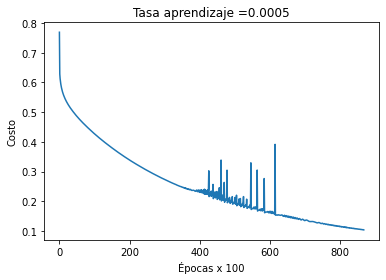

In [137]:
tamaño_capa_entrada = 9
tamaño_capa_oculta = 5000
tamaño_capa_salida = 1
dimensiones_capas = (tamaño_capa_entrada, tamaño_capa_oculta, tamaño_capa_salida)
parameteros = red_dos_capas(X_train, y_train, dimensiones_capas,0.0005, 86900)

Costo después de época 0: 0.7687226574576375
Costo después de época 100: 0.6729385986134396
Costo después de época 200: 0.656438906625809
Costo después de época 300: 0.6497875664486115
Costo después de época 400: 0.6453171300190376
Costo después de época 500: 0.6416153357085002
Costo después de época 600: 0.6383931013153598
Costo después de época 700: 0.6355235654960182
Costo después de época 800: 0.6329238305512382
Costo después de época 900: 0.6305540001703026
Costo después de época 1000: 0.6283893534608261
Costo después de época 1100: 0.6263962038589793
Costo después de época 1200: 0.6245384375291874
Costo después de época 1300: 0.6227860790325953
Costo después de época 1400: 0.6211299634056667
Costo después de época 1500: 0.619564975662465
Costo después de época 1600: 0.6180682105205684
Costo después de época 1700: 0.6166405075506464
Costo después de época 1800: 0.6152780326676641
Costo después de época 1900: 0.6139735515591449
Costo después de época 2000: 0.6127126578848763
Costo 

Costo después de época 17000: 0.5428827003005611
Costo después de época 17100: 0.5426326964097871
Costo después de época 17200: 0.5423845323604516
Costo después de época 17300: 0.542137736294021
Costo después de época 17400: 0.5418922152337468
Costo después de época 17500: 0.5416461476492899
Costo después de época 17600: 0.5414019848305651
Costo después de época 17700: 0.5411595651279074
Costo después de época 17800: 0.540918044978419
Costo después de época 17900: 0.5406762475415866
Costo después de época 18000: 0.5404334389671556
Costo después de época 18100: 0.5401911006582313
Costo después de época 18200: 0.5399503818687906
Costo después de época 18300: 0.5397120338439118
Costo después de época 18400: 0.5394745774095103
Costo después de época 18500: 0.5392376724716326
Costo después de época 18600: 0.5390010587658215
Costo después de época 18700: 0.5387657279086868
Costo después de época 18800: 0.5385312613783118
Costo después de época 18900: 0.5382972907186468
Costo después de época

Costo después de época 33800: 0.5099165587213362
Costo después de época 33900: 0.5097544623900969
Costo después de época 34000: 0.509592808408173
Costo después de época 34100: 0.5094314945756893
Costo después de época 34200: 0.509269966656668
Costo después de época 34300: 0.5091090156993121
Costo después de época 34400: 0.5089477160324424
Costo después de época 34500: 0.5087863468586847
Costo después de época 34600: 0.5086254765791388
Costo después de época 34700: 0.5084650042844324
Costo después de época 34800: 0.5083048247997813
Costo después de época 34900: 0.5081446637858289
Costo después de época 35000: 0.5079847478182734
Costo después de época 35100: 0.5078247697458617
Costo después de época 35200: 0.5076647447159436
Costo después de época 35300: 0.5075047252177004
Costo después de época 35400: 0.5073452616983007
Costo después de época 35500: 0.5071866286385048
Costo después de época 35600: 0.5070281056403488
Costo después de época 35700: 0.5068699596776814
Costo después de época

Costo después de época 50500: 0.4850709355480001
Costo después de época 50600: 0.48493468273703366
Costo después de época 50700: 0.48479849930370644
Costo después de época 50800: 0.484662224551809
Costo después de época 50900: 0.4845260695450333
Costo después de época 51000: 0.48439039444994314
Costo después de época 51100: 0.4842552059617581
Costo después de época 51200: 0.4841202374978791
Costo después de época 51300: 0.4839853810791958
Costo después de época 51400: 0.4838507182565399
Costo después de época 51500: 0.4837156229463915
Costo después de época 51600: 0.4835807532634638
Costo después de época 51700: 0.4834464112183858
Costo después de época 51800: 0.4833123570966439
Costo después de época 51900: 0.48317811905071056
Costo después de época 52000: 0.48304346264855236
Costo después de época 52100: 0.48290822738518785
Costo después de época 52200: 0.4827730641672216
Costo después de época 52300: 0.48263795954158645
Costo después de época 52400: 0.48250336570781
Costo después de

Costo después de época 67100: 0.46390850769100755
Costo después de época 67200: 0.463789557672267
Costo después de época 67300: 0.4636707132172393
Costo después de época 67400: 0.46355188697429084
Costo después de época 67500: 0.4634329576809896
Costo después de época 67600: 0.463313929797798
Costo después de época 67700: 0.4631949022364382
Costo después de época 67800: 0.4630759496168569
Costo después de época 67900: 0.4629568506920805
Costo después de época 68000: 0.46283771986596334
Costo después de época 68100: 0.46271867876899275
Costo después de época 68200: 0.4625997918067485
Costo después de época 68300: 0.46248082118305145
Costo después de época 68400: 0.46236202062414455
Costo después de época 68500: 0.4622431162059422
Costo después de época 68600: 0.46212378721978997
Costo después de época 68700: 0.4620044990894175
Costo después de época 68800: 0.4618853065763513
Costo después de época 68900: 0.4617658841749116
Costo después de época 69000: 0.46164686163558843
Costo después 

Costo después de época 83800: 0.4447105979089479
Costo después de época 83900: 0.444600326226061
Costo después de época 84000: 0.4444900679587354
Costo después de época 84100: 0.444379763105522
Costo después de época 84200: 0.44426940285513516
Costo después de época 84300: 0.4441592974385494
Costo después de época 84400: 0.44404909758425154
Costo después de época 84500: 0.4439384814030195
Costo después de época 84600: 0.4438279078985114
Costo después de época 84700: 0.4437173992785193
Costo después de época 84800: 0.44360720204888626
Costo después de época 84900: 0.44349716281873386
Costo después de época 85000: 0.4433869135772664
Costo después de época 85100: 0.44327656996945286
Costo después de época 85200: 0.4431661285483514
Costo después de época 85300: 0.44305564097177547
Costo después de época 85400: 0.4429448375399472
Costo después de época 85500: 0.44283371083634027
Costo después de época 85600: 0.44272249215891124
Costo después de época 85700: 0.4426112078421285
Costo después 

Costo después de época 100400: 0.42686016136762023
Costo después de época 100500: 0.4267571605448848
Costo después de época 100600: 0.42665377135860927
Costo después de época 100700: 0.4265501375763106
Costo después de época 100800: 0.4264466698604996
Costo después de época 100900: 0.4263432989861629
Costo después de época 101000: 0.4262399256486417
Costo después de época 101100: 0.4261365792595994
Costo después de época 101200: 0.42603301441356073
Costo después de época 101300: 0.4259295932719831
Costo después de época 101400: 0.42582601269084985
Costo después de época 101500: 0.4257224940497673
Costo después de época 101600: 0.425619155422622
Costo después de época 101700: 0.42551585949596554
Costo después de época 101800: 0.425412823865385
Costo después de época 101900: 0.42530992851167626
Costo después de época 102000: 0.42520705150408183
Costo después de época 102100: 0.42510425741118213
Costo después de época 102200: 0.4250014389993034
Costo después de época 102300: 0.42489882710

Costo después de época 116700: 0.41051532760504167
Costo después de época 116800: 0.41041773620806554
Costo después de época 116900: 0.4103202062802063
Costo después de época 117000: 0.41022281452170245
Costo después de época 117100: 0.4101254351313383
Costo después de época 117200: 0.4100283728439389
Costo después de época 117300: 0.40993148411752006
Costo después de época 117400: 0.4098346438212805
Costo después de época 117500: 0.4097379032314226
Costo después de época 117600: 0.40964115400471685
Costo después de época 117700: 0.40954435685790513
Costo después de época 117800: 0.4094476191800418
Costo después de época 117900: 0.40935077527083086
Costo después de época 118000: 0.4092538182283049
Costo después de época 118100: 0.4091565428943961
Costo después de época 118200: 0.4090591918128164
Costo después de época 118300: 0.4089615900130443
Costo después de época 118400: 0.40886434965541607
Costo después de época 118500: 0.4087675899437302
Costo después de época 118600: 0.408671059

Costo después de época 133000: 0.3950954181285581
Costo después de época 133100: 0.3950035434769135
Costo después de época 133200: 0.39491151443898326
Costo después de época 133300: 0.39481943762838445
Costo después de época 133400: 0.394727301975134
Costo después de época 133500: 0.39463528209493676
Costo después de época 133600: 0.3945433590948996
Costo después de época 133700: 0.39445136464056085
Costo después de época 133800: 0.39435951598039104
Costo después de época 133900: 0.3942677064136009
Costo después de época 134000: 0.3941758373002849
Costo después de época 134100: 0.3940838309816917
Costo después de época 134200: 0.393991710844911
Costo después de época 134300: 0.39389938896593385
Costo después de época 134400: 0.39380691643507526
Costo después de época 134500: 0.39371438184722074
Costo después de época 134600: 0.39362201341412073
Costo después de época 134700: 0.3935297280225569
Costo después de época 134800: 0.39343748672738116
Costo después de época 134900: 0.393345534

Costo después de época 149300: 0.3804703085945557
Costo después de época 149400: 0.38038155731163076
Costo después de época 149500: 0.3802930115911234
Costo después de época 149600: 0.38020450540060735
Costo después de época 149700: 0.3801161623026473
Costo después de época 149800: 0.38002812977805384
Costo después de época 149900: 0.37994000007583306
Costo después de época 150000: 0.3798516601014007
Costo después de época 150100: 0.3797633985968937
Costo después de época 150200: 0.37967515594755946
Costo después de época 150300: 0.37958693656301773
Costo después de época 150400: 0.37949880485315146
Costo después de época 150500: 0.3794106178856275
Costo después de época 150600: 0.37932264109001207
Costo después de época 150700: 0.37923457046574044
Costo después de época 150800: 0.379146924766676
Costo después de época 150900: 0.37905955287683973
Costo después de época 151000: 0.3789722934200075
Costo después de época 151100: 0.3788852513176434
Costo después de época 151200: 0.37879825

Costo después de época 165600: 0.36646877543554685
Costo después de época 165700: 0.3663845816262932
Costo después de época 165800: 0.36630046067939054
Costo después de época 165900: 0.3662163782895119
Costo después de época 166000: 0.36613222814318463
Costo después de época 166100: 0.3660480400844989
Costo después de época 166200: 0.36596390036684234
Costo después de época 166300: 0.3658799028735279
Costo después de época 166400: 0.36579598372429345
Costo después de época 166500: 0.36571207786616766
Costo después de época 166600: 0.36562778382577643
Costo después de época 166700: 0.3655437210555796
Costo después de época 166800: 0.36545967473575985
Costo después de época 166900: 0.3653752739089911
Costo después de época 167000: 0.3652908401958711
Costo después de época 167100: 0.36520648878286804
Costo después de época 167200: 0.3651222806008475
Costo después de época 167300: 0.36503810529015407
Costo después de época 167400: 0.36495380139685135
Costo después de época 167500: 0.364869

Costo después de época 181900: 0.35314310197147264
Costo después de época 182000: 0.3530634092423387
Costo después de época 182100: 0.35298367279564635
Costo después de época 182200: 0.35290369926254683
Costo después de época 182300: 0.35282335617445
Costo después de época 182400: 0.35274289833282774
Costo después de época 182500: 0.352662415396633
Costo después de época 182600: 0.35258206387696706
Costo después de época 182700: 0.35250176512588827
Costo después de época 182800: 0.35242180376356724
Costo después de época 182900: 0.35234193019194227
Costo después de época 183000: 0.3522621433551219
Costo después de época 183100: 0.35218261408715135
Costo después de época 183200: 0.3521031093184403
Costo después de época 183300: 0.35202361631696816
Costo después de época 183400: 0.35194414240261523
Costo después de época 183500: 0.3518645631538976
Costo después de época 183600: 0.3517849452323667
Costo después de época 183700: 0.35170517228711257
Costo después de época 183800: 0.35162547

Costo después de época 198200: 0.3404511037917879
Costo después de época 198300: 0.34037591993739363
Costo después de época 198400: 0.34030067952593623
Costo después de época 198500: 0.3402254858157685
Costo después de época 198600: 0.3401502892215614
Costo después de época 198700: 0.3400750511997187
Costo después de época 198800: 0.3399997995952595
Costo después de época 198900: 0.339924368756257
Costo después de época 199000: 0.3398490428163122
Costo después de época 199100: 0.3397737332577826
Costo después de época 199200: 0.3396984683284906
Costo después de época 199300: 0.33962333835703895
Costo después de época 199400: 0.3395482835661182
Costo después de época 199500: 0.3394733314792188
Costo después de época 199600: 0.3393984576584324
Costo después de época 199700: 0.33932350898197117
Costo después de época 199800: 0.33924841396979155
Costo después de época 199900: 0.33917333326409604


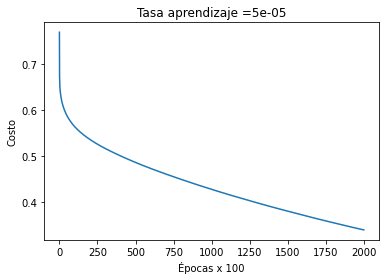

In [143]:
tamaño_capa_entrada = 9
tamaño_capa_oculta = 5000
tamaño_capa_salida = 1
dimensiones_capas = (tamaño_capa_entrada, tamaño_capa_oculta, tamaño_capa_salida)
parameteros = red_dos_capas(X_train, y_train, dimensiones_capas,0.00005, 200000)

In [139]:
print(parameteros)

{'W1': array([[ 0.02741235, -0.00462994, -0.01002626, ...,  0.01140768,
        -0.01277259,  0.0092511 ],
       [-0.0039855 ,  0.01964516, -0.01314976, ..., -0.02099101,
        -0.00111191, -0.01505851],
       [-0.00470097,  0.00771301, -0.01615122, ...,  0.02078087,
        -0.01014388, -0.00461654],
       ...,
       [-0.01175528,  0.01314027,  0.01530757, ..., -0.02178606,
        -0.00712736, -0.02383258],
       [-0.01286882, -0.01577331, -0.00436751, ..., -0.00342089,
        -0.02269705,  0.00461799],
       [ 0.00258373, -0.03496354, -0.00757794, ..., -0.04238758,
         0.0355801 , -0.00466676]]), 'b1': array([[-0.00206238],
       [-0.00122506],
       [-0.00312068],
       ...,
       [-0.00022902],
       [-0.00116067],
       [-0.00070376]]), 'W2': array([[ 0.05260329,  0.02485368,  0.03512138, ..., -0.03488547,
         0.03648596,  0.08864399]]), 'b2': array([[-0.157024]])}


### Predictions 

In [140]:
def generar_predicciones(X, y, parameteros):
    m = X.shape[1]
    n,L = len(parameteros) // 2 
    p = np.zeros((1,m))
    
    # Propagacion hacia adelante
    memorias = []
    A = X                
    
    for l in range(1, L):
        A_prev = A 
        A, memoria = activacion_lineal_adelante(A_prev, parameteros['W' + str(l)],parameteros['b' + str(l)],activacion='relu')
        memorias.append(memooria)
    
    AL, cache = activacion_lineal_adelante(A, parameteros['W' + str(L)],parameteros['b' + str(L)],activacion='sigmoide')
    memorias.append(memoria)
    
            
    y_predecida, caches =  AL, caches

 
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


### Training Data

In [141]:
pred_train = generar_predicciones(X_train, y_train, parameteros)

predictions: [[1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
  1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.
  1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
  0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
  0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
  0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
  0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
  1. 0. 1. 0. 0. 0. 0. 1.

### Test Data

In [142]:
pred_test = generar_predicciones(X_test, y_test, parameteros)

predictions: [[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
true labels: [[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
  0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
  0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
  1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.]]
Accuracy: 0.6293103448275862
